In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronicaastorino","key":"54c2af6efd7d9e1c3f94a8fbe142e1ac"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits

Streaming output truncated to the last 5000 lines.
  inflating: fruits/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  in

# Preprocessing

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

In [4]:
train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

In [5]:
import os
import shutil
fruits = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
!mkdir -p "/content/fruits/fruits-360/train1/"
!mkdir -p "/content/fruits/fruits-360/test1/"


In [6]:
from os import walk
import os, re

BASE_PATH= "/content/fruits/fruits-360/train1/"
base1_path= "/content/fruits/fruits-360/test1/"

def fruitdir(path):
  for i in fruits:
    out_dir = os.path.join(path+i)

    if not os.path.isdir(out_dir):
            os.mkdir(out_dir)


fruitdir(BASE_PATH)
fruitdir(base1_path)

  

In [7]:
trainjpg=[]
for i ,j ,k in walk(train_path):
 trainjpg.append(i)

testjpg=[]
for i ,j ,k in walk(test_path):
 testjpg.append(i)


In [8]:
def fruitsjpg(list,path):
  for i in fruits:
       for j in list:
             if i in j:
               file_names = os.listdir(j+"/")
               for file_name in file_names:
                 shutil.copy(os.path.join(j+"/", file_name), path+i+"/")

fruitsjpg(trainjpg,BASE_PATH)
fruitsjpg(testjpg,base1_path)

In [9]:
train_path="/content/fruits/fruits-360/test1/"
test_path="/content/fruits/fruits-360/train1/"

In [10]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  10


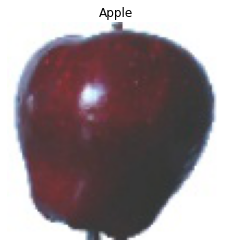

In [11]:
img = load_img(train_path + "Apple/0_100.jpg")
plt.imshow(img)
plt.title("Apple")
plt.axis("off")
plt.show()



In [12]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

(100, 100, 3)


In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 50,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 50,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 5855 images belonging to 10 classes.
Found 9192 images belonging to 10 classes.


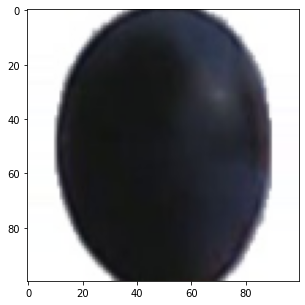

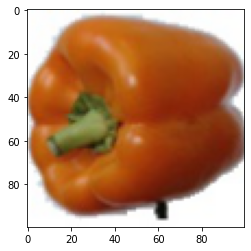

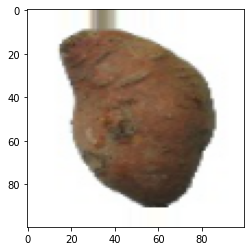

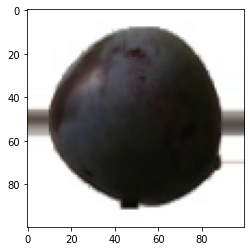

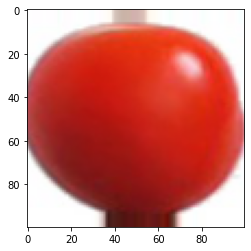

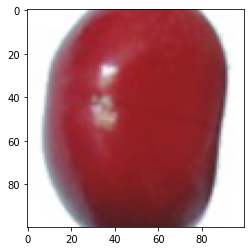

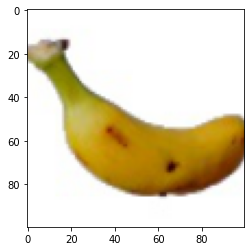

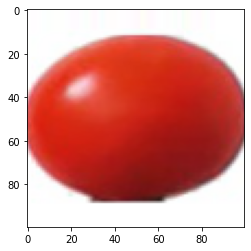

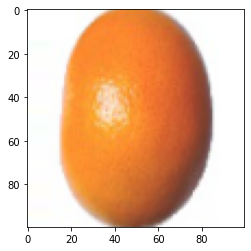

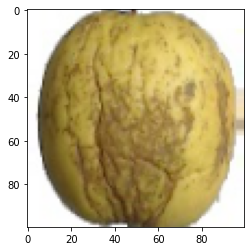

In [14]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()

In [15]:
xtest,ytest=test_generator.next()

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Activation, MaxPool2D, InputLayer
from keras.layers.normalization import BatchNormalization
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import datetime
from sklearn.utils import shuffle
import random

In [17]:
#tf.keras.backend.clear_session()
#batch_size = 32
#number_of_batch = 1600 // batch_size

# VGG 3

In [18]:
vgg3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

vgg3.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
vgg3hist = vgg3.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = test_generator
    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 46s 252ms/step - loss: 2.2039 - accuracy: 0.1782 - val_loss: 1.6485 - val_accuracy: 0.3599
Epoch 2/10
50/50 [==============================] - 12s 237ms/step - loss: 1.6249 - accuracy: 0.4056 - val_loss: 1.1018 - val_accuracy: 0.5603
Epoch 3/10
50/50 [==============================] - 12s 233ms/step - loss: 1.2851 - accuracy: 0.5286 - val_loss: 0.8365 - val_accuracy: 0.7228
Epoch 4/10
50/50 [==============================] - 12s 236ms/step - loss: 1.0614 - accuracy: 0.6356 - val_loss: 0.8574 - val_accuracy: 0.6783
Epoch 5/10
50/50 [==============================] - 12s 235ms/step - loss: 0.7934 - accuracy: 0.7205 - val_loss: 0.5959 - val_accuracy: 0.7942
Epoch 6/10
50/50 [==============================] - 12s 234ms/step - loss: 0.6225 - accuracy: 0.7840 - val_loss: 0.4919 - val_accuracy: 0.8730
Epoch 7/10
50/50 [==============================] - 12s 237ms/step - loss: 0.5037 - accuracy: 0.8362 - val_loss: 0.3821 - val_accuracy: 0.8904

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


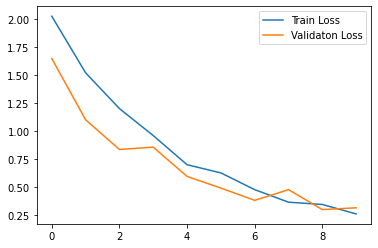

In [20]:
print(vgg3hist.history.keys())
plt.plot(vgg3hist.history["loss"],label = "Train Loss")
plt.plot(vgg3hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()


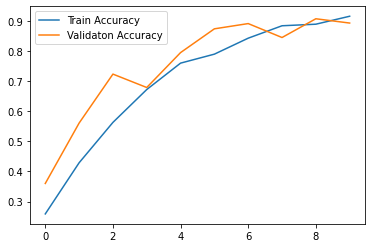

In [21]:
plt.figure()
plt.plot(vgg3hist.history["accuracy"],label = "Train Accuracy")
plt.plot(vgg3hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


In [22]:
vgg3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

# VGG13

In [23]:
vggmodel = Sequential() 
vggmodel.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
vggmodel.add(Conv2D(64,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2, 2))

vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))




vggmodel.add(Flatten())
vggmodel.add(Dense(6000,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(number_of_class,activation = 'softmax'))
vggmodel.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])



In [24]:
hist1 = vggmodel.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = test_generator,
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 19s 294ms/step - loss: 13.1480 - accuracy: 0.1344 - val_loss: 2.2823 - val_accuracy: 0.1224
Epoch 2/10
50/50 [==============================] - 13s 268ms/step - loss: 2.5958 - accuracy: 0.1585 - val_loss: 2.2447 - val_accuracy: 0.2026
Epoch 3/10
50/50 [==============================] - 14s 282ms/step - loss: 2.3585 - accuracy: 0.1804 - val_loss: 1.9346 - val_accuracy: 0.2920
Epoch 4/10
50/50 [==============================] - 13s 269ms/step - loss: 2.1682 - accuracy: 0.2200 - val_loss: 1.7673 - val_accuracy: 0.3396
Epoch 5/10
50/50 [==============================] - 13s 269ms/step - loss: 2.5499 - accuracy: 0.2613 - val_loss: 2.1036 - val_accuracy: 0.2381
Epoch 6/10
50/50 [==============================] - 13s 269ms/step - loss: 1.8876 - accuracy: 0.2971 - val_loss: 1.5102 - val_accuracy: 0.4048
Epoch 7/10
50/50 [==============================] - 13s 266ms/step - loss: 2.0303 - accuracy: 0.3101 - val_loss: 1.3329 - val_accuracy: 0.413

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


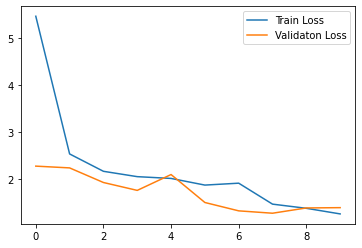

In [25]:
print(hist1.history.keys())
plt.plot(hist1.history["loss"],label = "Train Loss")
plt.plot(hist1.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()


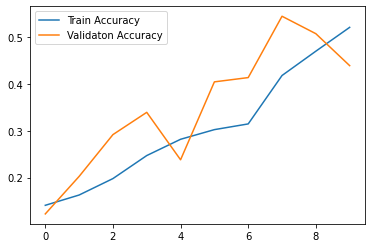

In [26]:
plt.figure()
plt.plot(hist1.history["accuracy"],label = "Train Accuracy")
plt.plot(hist1.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


# LENET

In [28]:
input_shape = (100,100,3)
lenet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

lenet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


lenethist = lenet.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = test_generator,
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 11s 218ms/step - loss: 2.1647 - accuracy: 0.2921 - val_loss: 1.1663 - val_accuracy: 0.5923
Epoch 2/10
50/50 [==============================] - 10s 209ms/step - loss: 1.2125 - accuracy: 0.5985 - val_loss: 0.8635 - val_accuracy: 0.7559
Epoch 3/10
50/50 [==============================] - 11s 212ms/step - loss: 0.8523 - accuracy: 0.7338 - val_loss: 0.6413 - val_accuracy: 0.7975
Epoch 4/10
50/50 [==============================] - 10s 210ms/step - loss: 0.5959 - accuracy: 0.8193 - val_loss: 0.6051 - val_accuracy: 0.8135
Epoch 5/10
50/50 [==============================] - 10s 211ms/step - loss: 0.5538 - accuracy: 0.8430 - val_loss: 0.5187 - val_accuracy: 0.8528
Epoch 6/10
50/50 [==============================] - 10s 210ms/step - loss: 0.3940 - accuracy: 0.9039 - val_loss: 0.6001 - val_accuracy: 0.8173
Epoch 7/10
50/50 [==============================] - 10s 209ms/step - loss: 0.3216 - accuracy: 0.9245 - val_loss: 0.4607 - val_accuracy: 0.8454

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


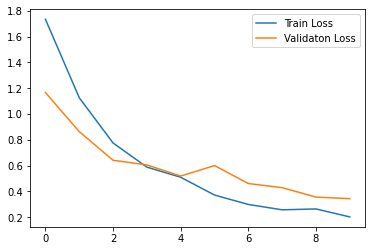

In [29]:
print(lenethist.history.keys())
plt.plot(lenethist.history["loss"],label = "Train Loss")
plt.plot(lenethist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()




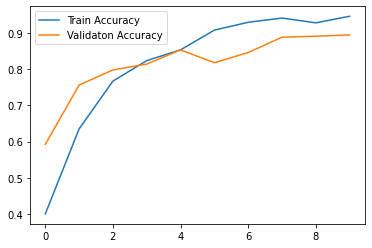

In [30]:
plt.figure()
plt.plot(lenethist.history["accuracy"],label = "Train Accuracy")
plt.plot(lenethist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


# RESNET50

In [31]:

resnet = Sequential()
resnet.add(InputLayer(input_shape= (100,100,3)))

resnet.add(Conv2D(filters = 64, kernel_size= 7,strides=2, padding= 'same', activation= 'relu'))

resnet.add(Conv2D(filters= 32, kernel_size= 5, padding='same', activation= 'relu'))
resnet.add(MaxPool2D(pool_size=2, strides=2))
resnet.add(Conv2D(filters= 16, kernel_size= 5, padding='same', activation= 'relu'))


resnet.add(Flatten())
resnet.add(Dense(256, activation= tf.keras.activations.relu))

resnet.add(Dense(10, activation= 'softmax'))

resnet.compile(
             loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
  
resnethist = resnet.fit_generator(
    generator = train_generator,
    steps_per_epoch = 50,
    epochs = 15,
    validation_data = test_generator,
  
)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
50/50 [==============================] - 12s 228ms/step - loss: 1.9271 - accuracy: 0.2994 - val_loss: 1.3108 - val_accuracy: 0.5820
Epoch 2/15
50/50 [==============================] - 11s 221ms/step - loss: 1.2133 - accuracy: 0.5469 - val_loss: 1.1309 - val_accuracy: 0.6032
Epoch 3/15
50/50 [==============================] - 11s 221ms/step - loss: 0.9387 - accuracy: 0.6792 - val_loss: 0.6949 - val_accuracy: 0.7688
Epoch 4/15
50/50 [==============================] - 11s 223ms/step - loss: 0.5675 - accuracy: 0.8202 - val_loss: 0.5986 - val_accuracy: 0.7913
Epoch 5/15
50/50 [==============================] - 11s 225ms/step - loss: 0.4402 - accuracy: 0.8411 - val_loss: 0.3541 - val_accuracy: 0.8921
Epoch 6/15
50/50 [==============================] - 11s 226ms/step - loss: 0.3953 - accuracy: 0.8744 - val_loss: 0.3506 - val_accuracy: 0.8940
Epoch 7/15
50/50 [==============================] - 11s 222ms/step - loss: 0.2887 - accuracy: 0.9024 - val_loss: 0.3571 - val_accuracy: 0.8980

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


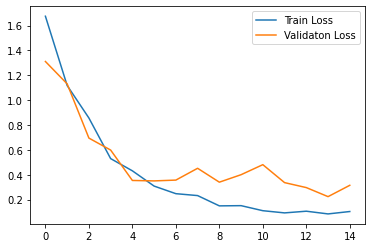

In [32]:
print(resnethist.history.keys())
plt.plot(resnethist.history["loss"],label = "Train Loss")
plt.plot(resnethist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()


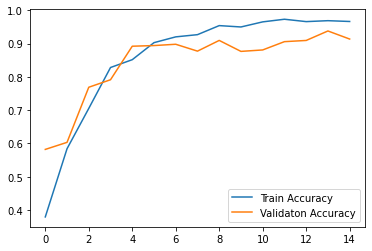

In [33]:
plt.figure()
plt.plot(resnethist.history["accuracy"],label = "Train Accuracy")
plt.plot(resnethist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()


In [34]:
classnamess=list(test_generator.class_indices.keys())
import numpy as np
 

# RESULTS

VGG3 results

Zero_one loss 0.0625


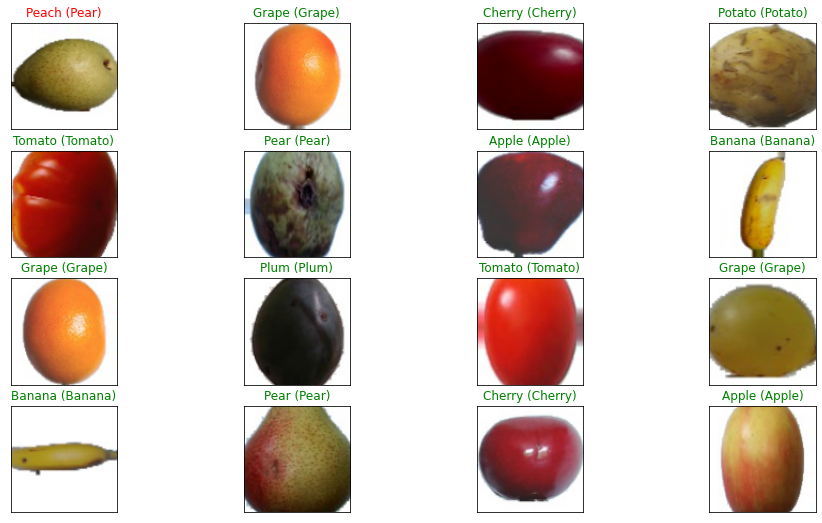

In [35]:
x,y=train_generator.next()
y_vgg3pred=vgg3.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_vgg3pred[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero_one loss",np.mean(loss))

  



VGG13 results

Zero one loss 0.5


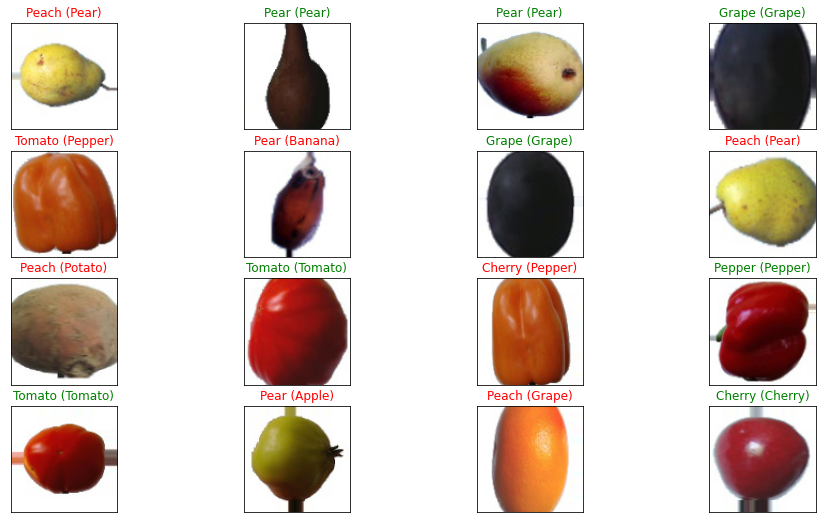

In [36]:
x,y=train_generator.next()
y_vgg13pred=vggmodel.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_vgg13pred[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero one loss",np.mean(loss))

  

    

LENET RESULTS

Zero one loss  0.0625


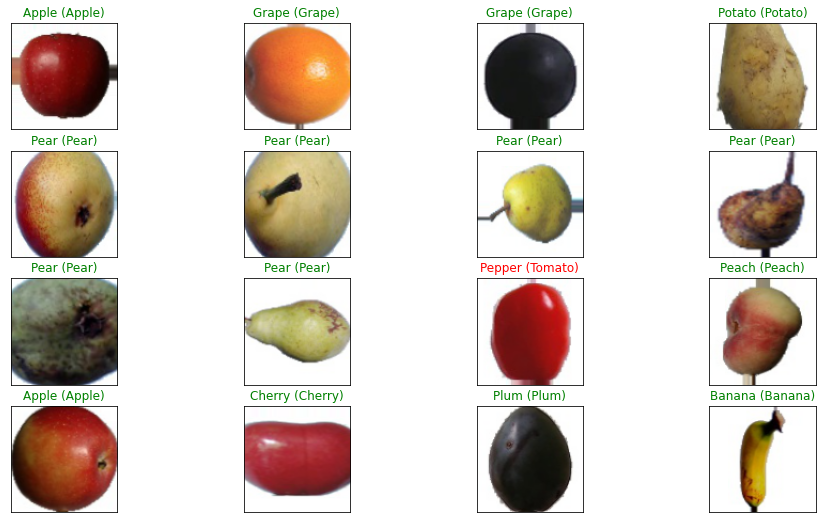

In [37]:
x,y=train_generator.next()
y_lenetpred=lenet.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_lenetpred[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero one loss ",np.mean(loss))


Resnet RESULTS

Zero one loss 0.0


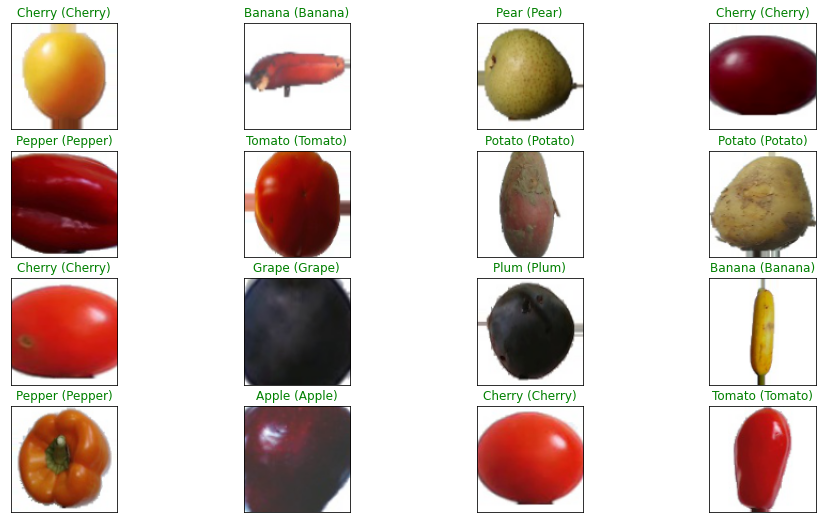

In [38]:
x,y=train_generator.next()
y_resnet=resnet.predict(x)



loss=[]
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_resnet[i])
    true_idx = np.argmax(y[i])

    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    if pred_idx==true_idx:

          loss.append(0)
    else:
       loss.append(1)


print("Zero one loss",np.mean(loss))

  